In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 we have 177 null values in Age and 687 null values in Cabin column

In [4]:
# We will replace those null values of age with their median 
median = df['Age'].median()
df['Age'].fillna(median, inplace=True)

In [9]:
df.drop(['Cabin'],axis=1,inplace=True)

In [5]:
mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode, inplace=True)

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df['Name'].duplicated().sum()


0

This means we dont have any duplicate values in our dataset 

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we have no null values and the data is cleaned !

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

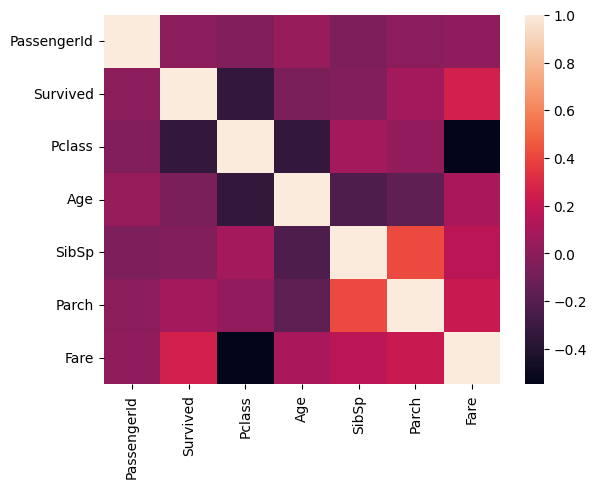

In [14]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())

In [15]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Text(0, 0.5, 'Age')

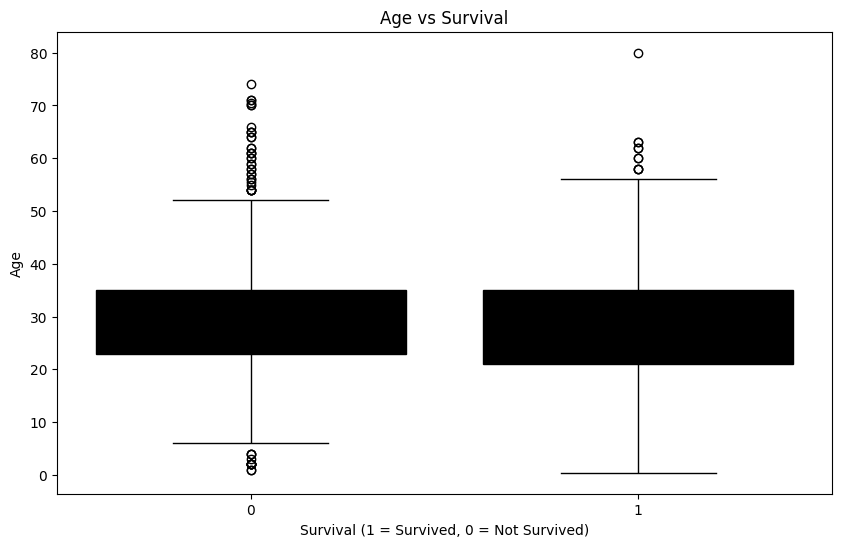

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Survived', y='Age',color='black')
plt.title('Age vs Survival')
plt.xlabel('Survival (1 = Survived, 0 = Not Survived)')
plt.ylabel('Age')



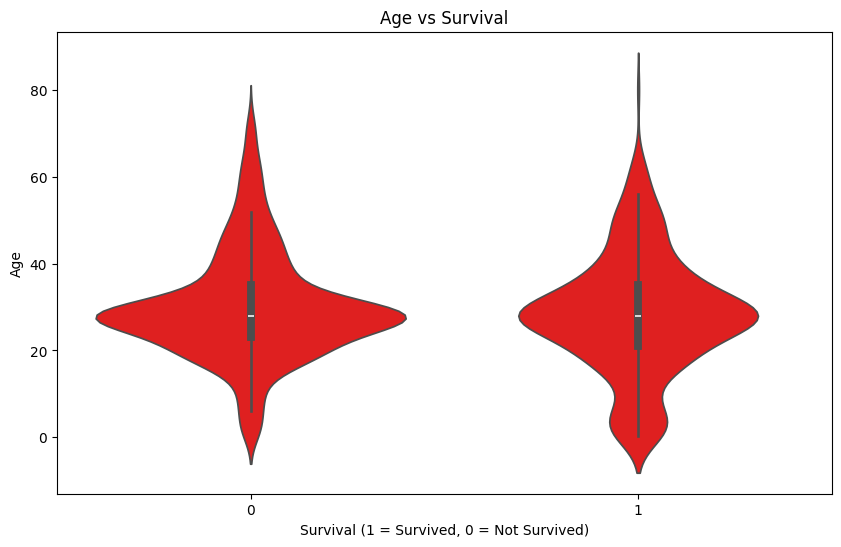

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Survived', y='Age',color='red')
plt.title('Age vs Survival')
plt.xlabel('Survival (1 = Survived, 0 = Not Survived)')
plt.ylabel('Age')

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14452\2675438190.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_counts = df.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)


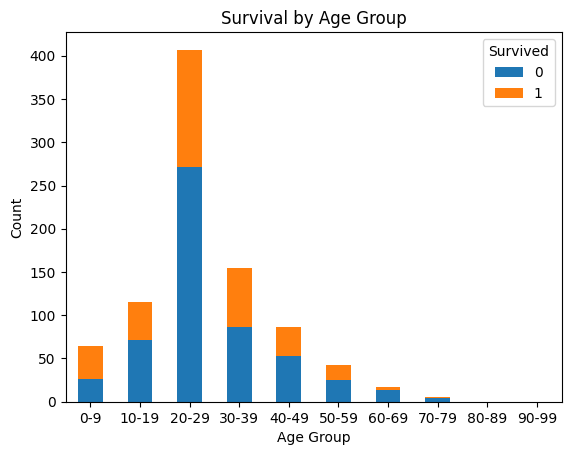

In [22]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

age_survival_counts = df.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)

ax = age_survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0) 

plt.show()

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-39


In [29]:
Passenger_counts = df['Pclass'].value_counts()
Passenger_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

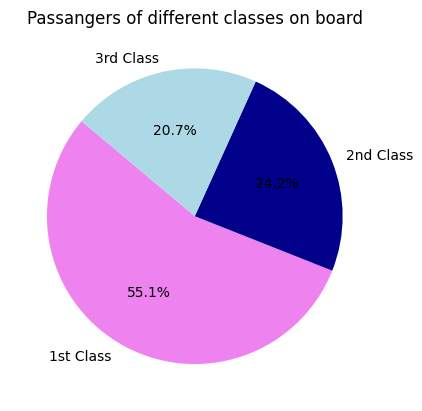

In [30]:
labels = ['1st Class', '2nd Class', '3rd Class']
sizes = Passenger_counts
colors = ['violet', 'darkblue', 'lightblue']  

plt.figure()
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Passangers of different classes on board')

plt.show()

In [32]:
survival_class_df = df[df['Survived'] == 1][['Pclass']]
survival_class_df.value_counts()

Pclass
1         136
3         119
2          87
Name: count, dtype: int64

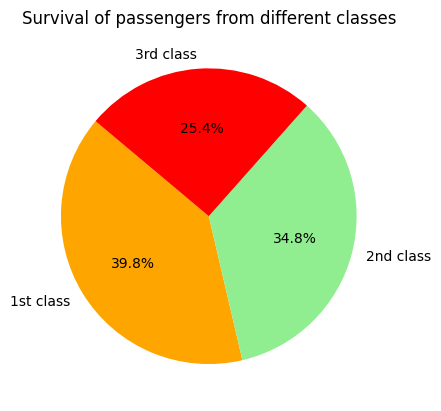

In [33]:
labels = ['1st class','2nd class','3rd class']
sizes = survival_class_df.value_counts()
colors = ['orange','lightgreen','red']
plt.figure()
plt.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival of passengers from different classes')
plt.show()

In [34]:
df_gender = df.groupby('Sex')['Survived'].sum()
df_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

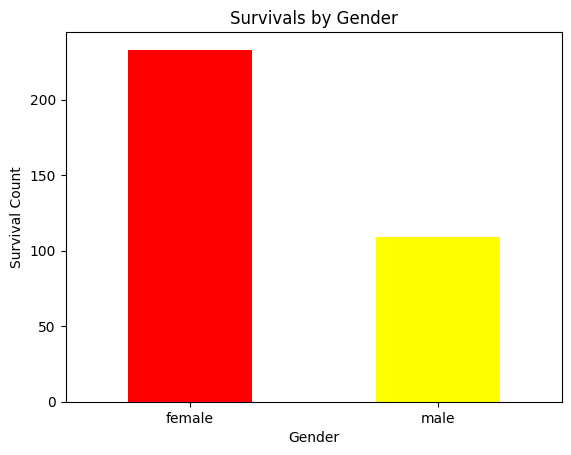

In [36]:
df_gender.plot(kind='bar', color=['red','yellow'])
plt.title('Survivals by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Count')
plt.xticks(rotation=0)
plt.show()


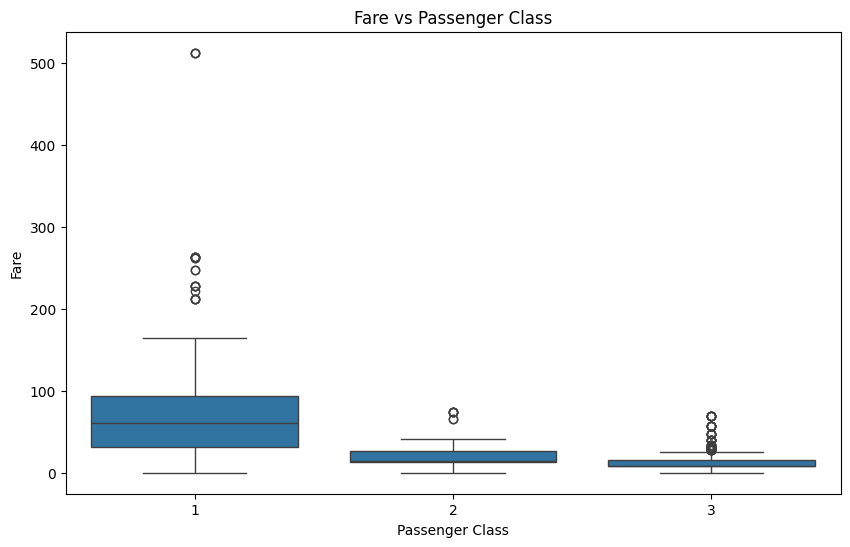

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare vs Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

The Embarking ports : 


C: Cherbourg - This corresponds to passengers who boarded the Titanic at the port of Cherbourg, France.

Q: Queenstown - This corresponds to passengers who boarded the Titanic at the port of Queenstown (now known as Cobh), Ireland.

S: Southampton - This corresponds to passengers who boarded the Titanic at the port of Southampton, England.

In [38]:
df_location = df['Embarked'].value_counts()
df_location

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

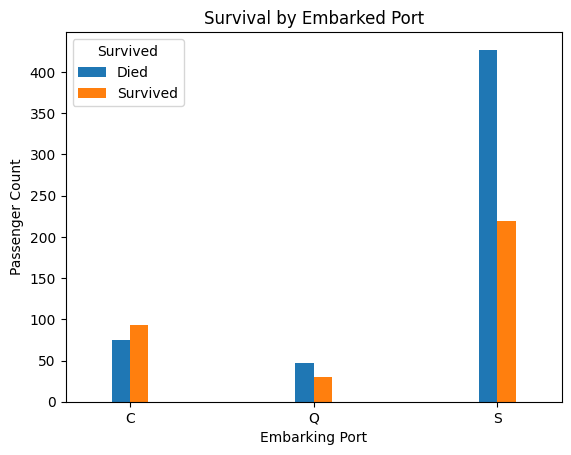

In [39]:
ct = pd.crosstab(df['Embarked'], df['Survived'])

grouped = df.groupby(['Embarked', 'Survived']).size().unstack()
grouped.plot(kind='bar', stacked=False, width=0.2)

plt.title('Survival by Embarked Port')
plt.xlabel('Embarking Port')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['Died','Survived'])
plt.xticks(rotation=0)

plt.show()

Text(0.5, 1.0, 'Hisogram plots')

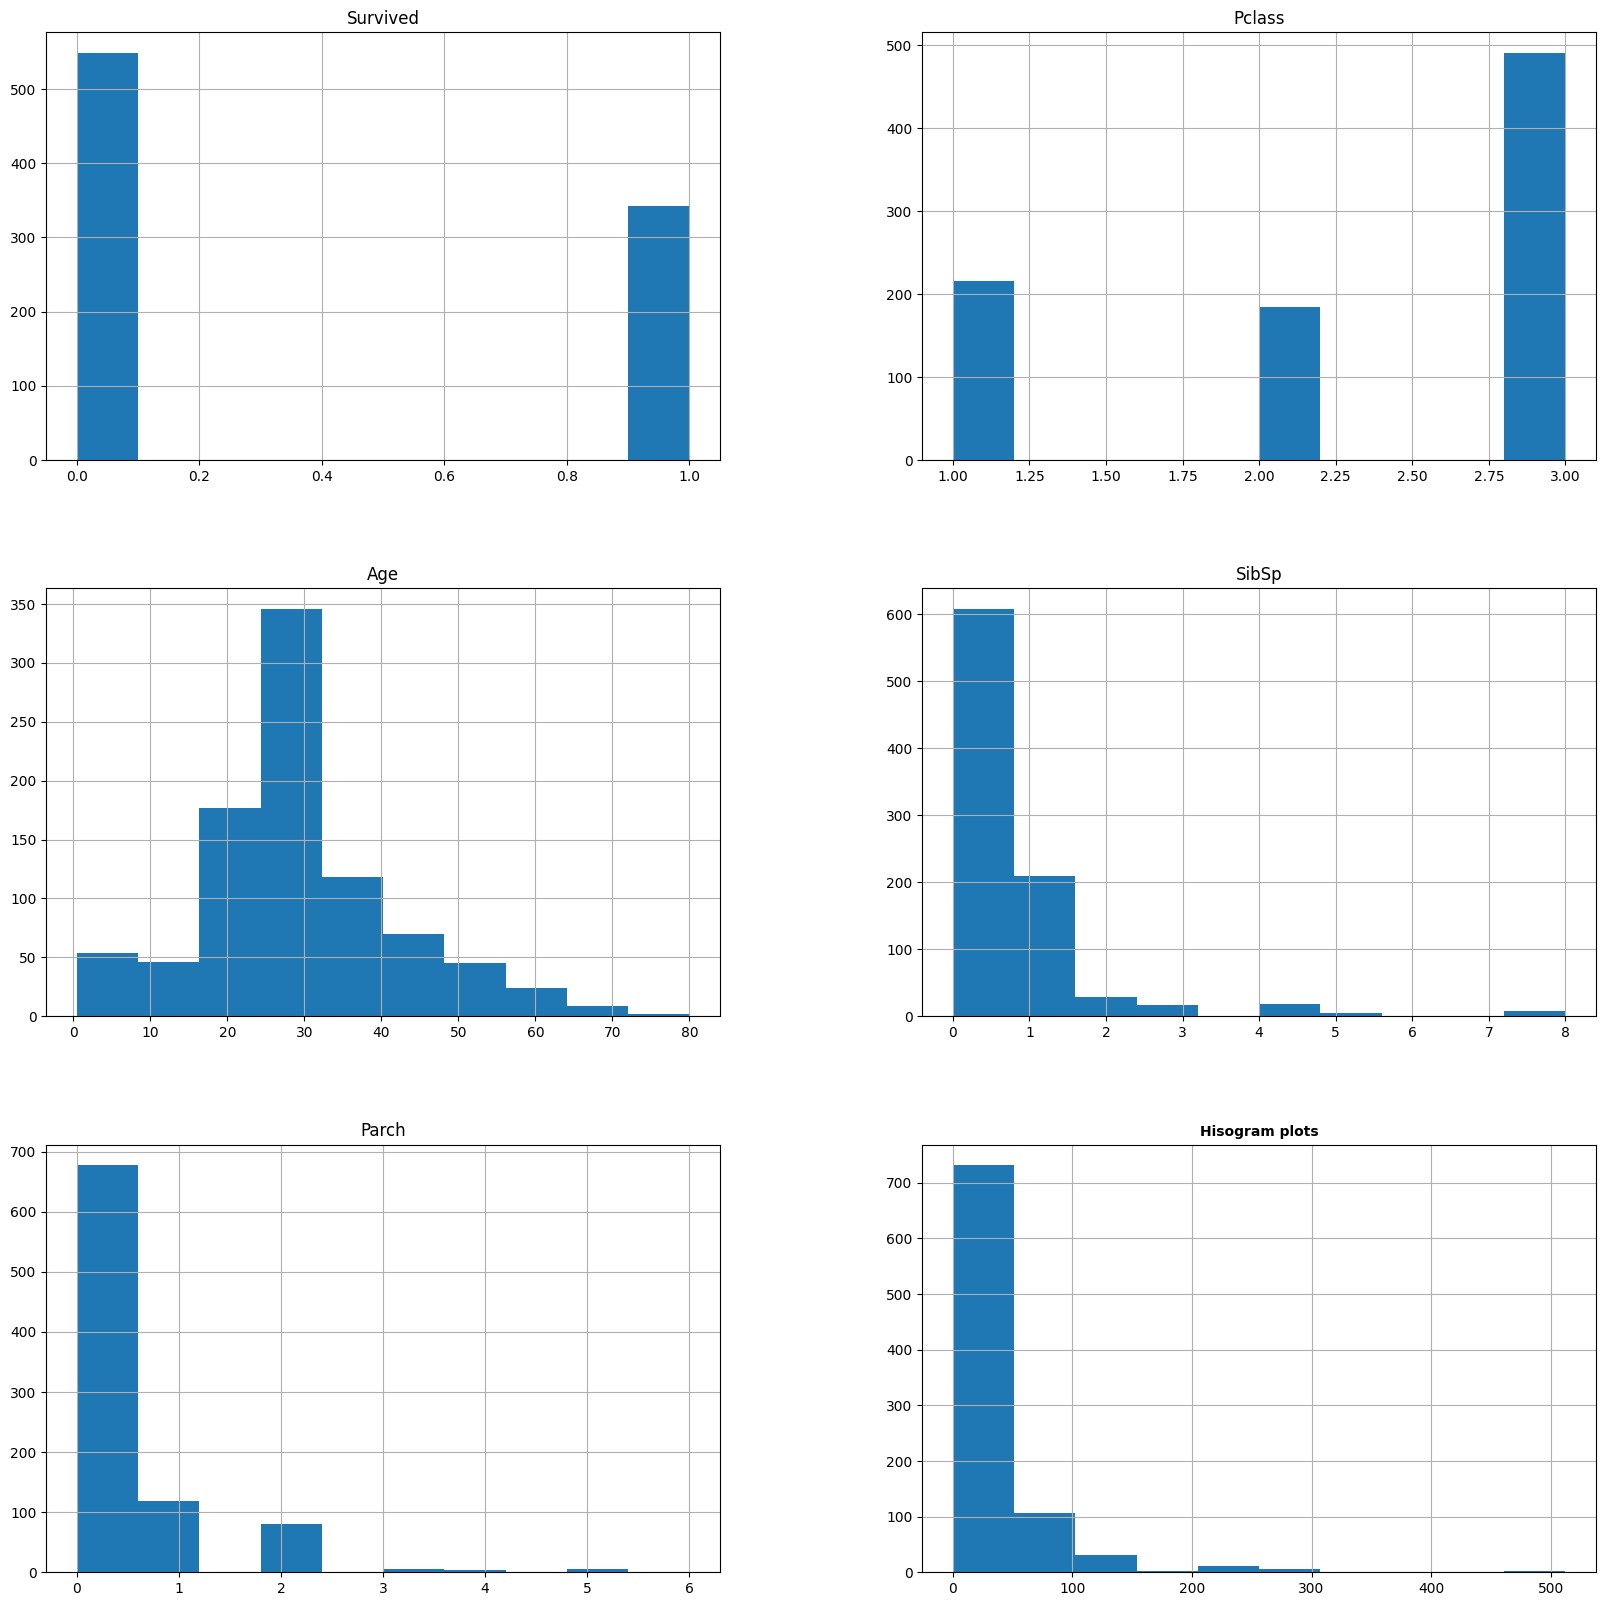

In [40]:
df.drop(['PassengerId'],axis=1,inplace=True)
df.hist(figsize=(20,20))
plt.title("Hisogram plots", size=10, weight='bold')

In [ ]:
!pip install lazypredict --no-warn-script-location

In [41]:
import lazypredict

In [42]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20-29
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30-39
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20-29
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30-39
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30-39


In [43]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Sex']=L.fit_transform(df['Sex'])

In [44]:
df['Embarked']=L.fit_transform(df['Embarked'])

In [46]:
x=df[['Pclass','Sex','Age','SibSp','Parch','Embarked']].values
y=df['Survived'].values

In [47]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
cLassifier=LazyClassifier()

In [53]:
model=cLassifier.fit(x_train,y_train,x_test,y_test)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 85.21it/s]


In [54]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,2,20-29
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.28,0,30-39
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,2,20-29


In [55]:
print(model)

(Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: [], Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: [])


In [ ]:
df.head(3)